<a href="https://colab.research.google.com/github/Skshamim02/Navigating-the-Stock-Market-with-Data-Science/blob/main/stock_price_predipynb_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#OBJECT OF THE PROJECT STOCK PREDICTION
#Collect the stock WIPRO data
#Preprocess the data-train and test
#Predict the  test data and plot the output
#Predict the future 30 days and plot the output

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Collect historical stock data for WIPRO
wipro = yf.download('WIPRO.NS', start='2000-01-01', end='2023-08-31', progress=False)

In [3]:
wipro

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,102.150002,102.157501,102.150002,102.157501,83.336533,42639
2000-01-04,110.330627,110.330627,110.330627,110.330627,90.003860,117119
2000-01-05,110.330627,119.158127,101.812508,112.128754,91.470718,3527919
2000-01-06,117.926254,119.362503,104.625008,109.959381,89.701012,1942399
2000-01-07,103.162506,103.162506,101.163757,101.163757,82.525864,269599
...,...,...,...,...,...,...
2023-08-24,418.750000,420.000000,412.000000,412.700012,412.700012,2888478
2023-08-25,410.000000,411.299988,407.100006,409.700012,409.700012,3299255
2023-08-28,411.450012,412.450012,407.649994,408.049988,408.049988,1700987


<Axes: title={'center': "WIPRO.NS's stock price"}, xlabel='Date'>

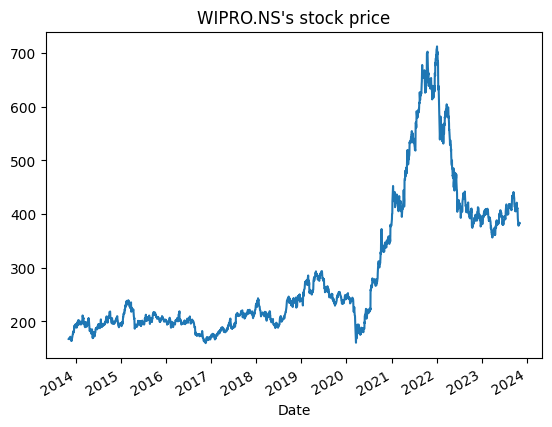

In [4]:
#showing the plot of 'close'
ticker = yf.Ticker('WIPRO.NS')
wipro = ticker.history(period="10y")
wipro['Close'].plot(title="WIPRO.NS's stock price")

In [5]:
#resets the index and then selects the 'Close' column,converting the DataFrame into a Series. The 'Close' column represents the closing prices of the Wipro Limited stock.
wipro=wipro.reset_index()['Close']

In [6]:
#data normalization
#All values will be scaled to a range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
wipro=scaler.fit_transform(np.array(wipro).reshape(-1,1))

In [7]:
wipro

array([[0.01397794],
       [0.01542328],
       [0.01514052],
       ...,
       [0.40065939],
       [0.40553829],
       [0.40535758]])

In [8]:
#splitting dataset into train and test split
#this code divides the original wipro dataset into a training set (train_data) and a test set (test_data)
# The training set contains the first portion of the data, while the test set contains the remaining portion
training_size=int(len(wipro)*0.65)
test_size=len(wipro)-training_size
train_data,test_data=wipro[0:training_size,:],wipro[training_size:len(wipro),:1]

In [9]:
training_size,test_size


(1603, 864)

In [10]:
train_data


array([[0.01397794],
       [0.01542328],
       [0.01514052],
       ...,
       [0.05009195],
       [0.04350306],
       [0.03958532]])

In [11]:
test_data

array([[0.03673606],
       [0.04065377],
       [0.04163321],
       [0.04902348],
       [0.04884538],
       [0.04848922],
       [0.07065996],
       [0.06727647],
       [0.091228  ],
       [0.09523474],
       [0.09665935],
       [0.08864583],
       [0.09737169],
       [0.10182363],
       [0.11553563],
       [0.10111134],
       [0.09870726],
       [0.09140603],
       [0.08250213],
       [0.09300879],
       [0.09051565],
       [0.1001319 ],
       [0.10075515],
       [0.1077002 ],
       [0.10057712],
       [0.10511811],
       [0.10084421],
       [0.10084421],
       [0.11375489],
       [0.10351536],
       [0.1034263 ],
       [0.10235785],
       [0.11152888],
       [0.11259735],
       [0.10876867],
       [0.11277542],
       [0.10957005],
       [0.10689885],
       [0.10778929],
       [0.11758354],
       [0.11295351],
       [0.18017798],
       [0.17866429],
       [0.1776849 ],
       [0.1945132 ],
       [0.19549276],
       [0.18596552],
       [0.187

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step) #X_train (input features) and y_train (output labels).
X_test, ytest = create_dataset(test_data, time_step) #X_test (input features) and y_test (output labels)

In [14]:
X_train

array([[0.01397794, 0.01542328, 0.01514052, ..., 0.05691642, 0.0618755 ,
        0.06102268],
       [0.01542328, 0.01514052, 0.01488919, ..., 0.0618755 , 0.06102268,
        0.05543187],
       [0.01514052, 0.01488919, 0.01492062, ..., 0.06102268, 0.05543187,
        0.06670822],
       ...,
       [0.13697124, 0.14477521, 0.14353363, ..., 0.04011957, 0.03994148,
        0.04118802],
       [0.14477521, 0.14353363, 0.14637145, ..., 0.03994148, 0.04118802,
        0.04537286],
       [0.14353363, 0.14637145, 0.15266779, ..., 0.04118802, 0.04537286,
        0.05009195]])

In [15]:
print(X_train.shape), print(y_train.shape)


(1502, 100)
(1502,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) #X_train from a 2D array of shape [samples, time steps]
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
X_test

array([[[0.03673606],
        [0.04065377],
        [0.04163321],
        ...,
        [0.2697513 ],
        [0.30696966],
        [0.30002456]],

       [[0.04065377],
        [0.04163321],
        [0.04902348],
        ...,
        [0.30696966],
        [0.30002456],
        [0.30937368]],

       [[0.04163321],
        [0.04902348],
        [0.04884538],
        ...,
        [0.30002456],
        [0.30937368],
        [0.35237958]],

       ...,

       [[0.43499264],
        [0.44014258],
        [0.43426979],
        ...,
        [0.39578043],
        [0.4031892 ],
        [0.40255673]],

       [[0.44014258],
        [0.43426979],
        [0.43020401],
        ...,
        [0.4031892 ],
        [0.40255673],
        [0.4021953 ]],

       [[0.43426979],
        [0.43020401],
        [0.42713212],
        ...,
        [0.40255673],
        [0.4021953 ],
        [0.40065939]]])

In [18]:
X_train

array([[[0.01397794],
        [0.01542328],
        [0.01514052],
        ...,
        [0.05691642],
        [0.0618755 ],
        [0.06102268]],

       [[0.01542328],
        [0.01514052],
        [0.01488919],
        ...,
        [0.0618755 ],
        [0.06102268],
        [0.05543187]],

       [[0.01514052],
        [0.01488919],
        [0.01492062],
        ...,
        [0.06102268],
        [0.05543187],
        [0.06670822]],

       ...,

       [[0.13697124],
        [0.14477521],
        [0.14353363],
        ...,
        [0.04011957],
        [0.03994148],
        [0.04118802]],

       [[0.14477521],
        [0.14353363],
        [0.14637145],
        ...,
        [0.03994148],
        [0.04118802],
        [0.04537286]],

       [[0.14353363],
        [0.14637145],
        [0.15266779],
        ...,
        [0.04118802],
        [0.04537286],
        [0.05009195]]])

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
#the shape of the input data.input sequences with 100 time steps and one feature at each time step.
#The input shape is only needed for the first layer because subsequent layers can infer their input shapes.
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)


Epoch 1/150
24/24 [==============================] - 28s 576ms/step - loss: 0.0016 - val_loss: 0.0170
Epoch 2/150
24/24 [==============================] - 6s 254ms/step - loss: 3.4378e-04 - val_loss: 0.0052
Epoch 3/150
24/24 [==============================] - 6s 233ms/step - loss: 3.0822e-04 - val_loss: 0.0029
Epoch 4/150
24/24 [==============================] - 6s 234ms/step - loss: 2.7456e-04 - val_loss: 0.0020
Epoch 5/150
24/24 [==============================] - 6s 252ms/step - loss: 2.4203e-04 - val_loss: 0.0020
Epoch 6/150
24/24 [==============================] - 6s 238ms/step - loss: 2.1301e-04 - val_loss: 0.0022
Epoch 7/150
24/24 [==============================] - 7s 281ms/step - loss: 1.9355e-04 - val_loss: 0.0013
Epoch 8/150
24/24 [==============================] - 5s 213ms/step - loss: 1.7635e-04 - val_loss: 0.0013
Epoch 9/150
24/24 [==============================] - 6s 265ms/step - loss: 1.6557e-04 - val_loss: 0.0017
Epoch 10/150
24/24 [==============================] - 5s 2

In [23]:
import tensorflow as tf

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 [==============================] - 1s 39ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE  train data performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

212.0623058977595

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


467.47768493042713

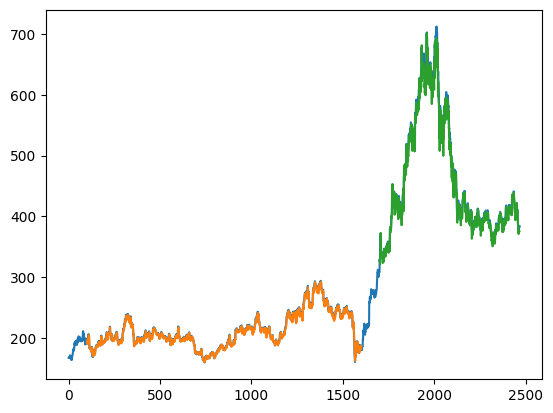

In [28]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(wipro)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(wipro)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(wipro)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(wipro))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()#green=predict test o/p ,orange=train, blue= whole dataset


In [29]:
len(test_data)

864

In [30]:
x_input=test_data[764:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.42713211886405217,
 0.4270417351208175,
 0.42866809104240305,
 0.4151154926669502,
 0.40129179820745703,
 0.3992137441523537,
 0.4034602360057951,
 0.40888127535597624,
 0.40309881132418407,
 0.3988523746164067,
 0.4005690039898991,
 0.40364094834660064,
 0.40364094834660064,
 0.4154768622028972,
 0.419904066397144,
 0.4277645844840395,
 0.4240601745073506,
 0.42821633776322127,
 0.42758387214323396,
 0.41692250578367723,
 0.4207171892122728,
 0.4203558196763258,
 0.42478296872490867,
 0.44420835972972444,
 0.4626399155786059,
 0.46616361321448924,
 0.4675188730520345,
 0.46697673602961803,
 0.44357594925540117,
 0.4424013466129974,
 0.43580575976607644,
 0.44005225161951783,
 0.43499263695094764,
 0.43282419915260967,
 0.44420835972972444,
 0.44764172876803704,
 0.4401425802170886,
 0.4344504999285312,
 0.4510750426606856,
 0.4552311507708922,
 0.46462764103613846,
 0.4672477769679943,
 0.4687837491463451,
 0.45866446466354077,
 0.4624592032378004,
 0.4687837491463451,
 0.466796023

In [33]:
len(wipro)

2467

In [34]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.39717728]
101
1 day input [0.42704174 0.42866809 0.41511549 0.4012918  0.39921374 0.40346024
 0.40888128 0.40309881 0.39885237 0.400569   0.40364095 0.40364095
 0.41547686 0.41990407 0.42776458 0.42406017 0.42821634 0.42758387
 0.41692251 0.42071719 0.42035582 0.42478297 0.44420836 0.46263992
 0.46616361 0.46751887 0.46697674 0.44357595 0.44240135 0.43580576
 0.44005225 0.43499264 0.4328242  0.44420836 0.44764173 0.44014258
 0.4344505  0.45107504 0.45523115 0.46462764 0.46724778 0.46878375
 0.45866446 0.4624592  0.46878375 0.46679602 0.45622504 0.46146537
 0.4659829  0.46263992 0.45803205 0.45261101 0.4496294  0.44971978
 0.44809348 0.45026186 0.46462764 0.49670212 0.49263634 0.48802843
 0.49444336 0.48929336 0.49805738 0.49832842 0.49959336 0.50094862
 0.50926083 0.50031615 0.48947407 0.48739602 0.46851271 0.46056186
 0.45839342 0.46336271 0.4447505  0.44601537 0.44493121 0.44393732
 0.44737063 0.44926803 0.44520225 0.44908732 0.47330128 0.4659829
 0.45505044 0.45351452 0.4556829  

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(wipro)

2467

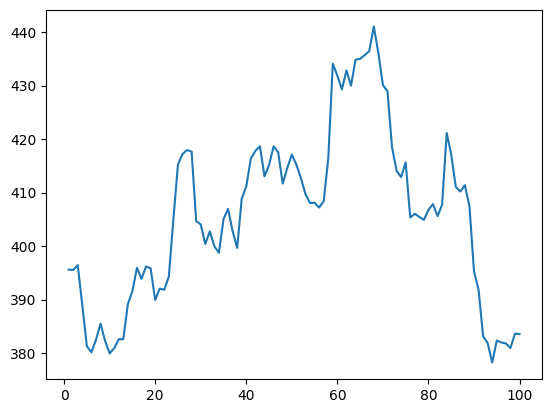

In [37]:
plt.plot(day_new,scaler.inverse_transform(wipro[2367:]))


In [38]:
lst_output

[[0.3971772789955139],
 [0.3875988721847534],
 [0.3782309889793396],
 [0.3690107464790344],
 [0.35974183678627014],
 [0.35012152791023254],
 [0.33996063470840454],
 [0.3292122483253479],
 [0.3179468512535095],
 [0.3063082993030548],
 [0.2944747507572174],
 [0.28262999653816223],
 [0.27094677090644836],
 [0.25957807898521423],
 [0.24865314364433289],
 [0.23827619850635529],
 [0.2285262495279312],
 [0.2194577306509018],
 [0.2111014574766159],
 [0.20346659421920776],
 [0.19654254615306854],
 [0.19030220806598663],
 [0.1847047656774521],
 [0.1796988844871521],
 [0.17522592842578888],
 [0.17122267186641693],
 [0.16762393712997437],
 [0.1643647998571396],
 [0.16138237714767456],
 [0.158617302775383]]

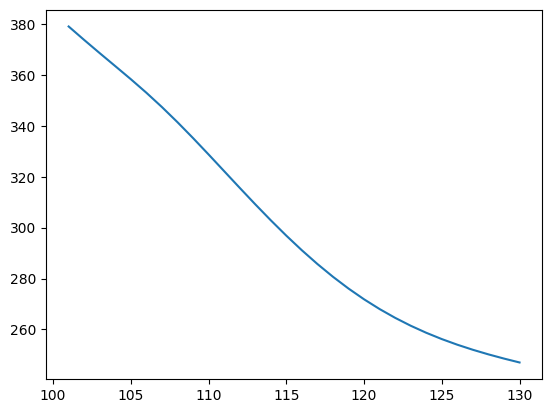

In [39]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

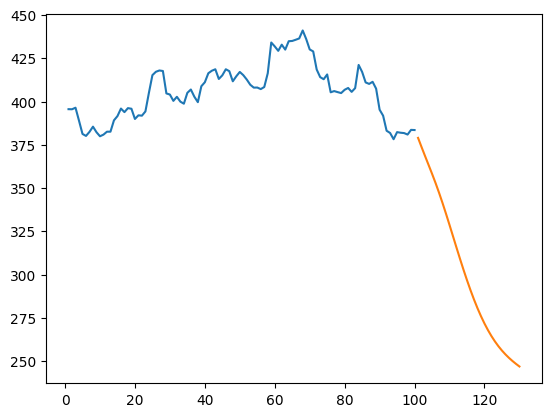

In [40]:
plt.plot(day_new,scaler.inverse_transform(wipro[2367:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

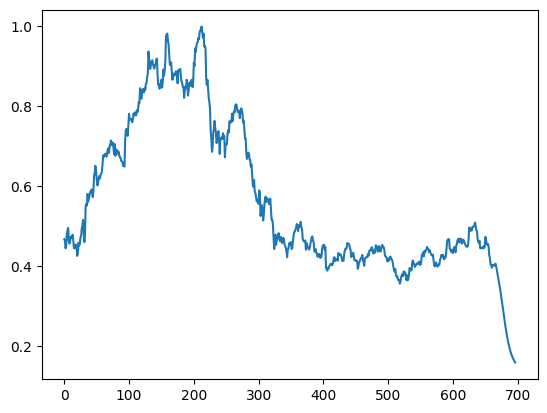

In [41]:
df3=wipro.tolist()
df3.extend(lst_output)
plt.plot(df3[1800:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

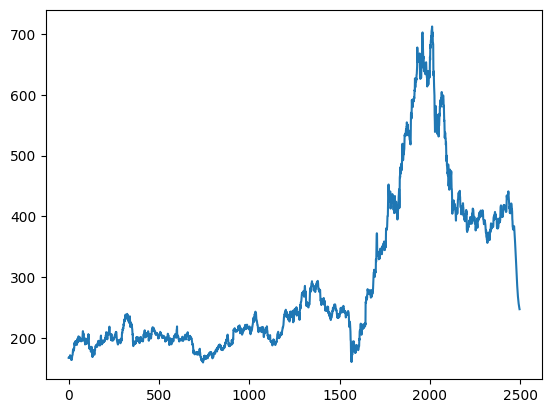

In [43]:
plt.plot(df3)